In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np

In [3]:
img1 = cv2.imread('/content/drive/MyDrive/패턴인식/PR201910769/images/book1.png')
img2 = cv2.imread('/content/drive/MyDrive/패턴인식/PR201910769/images/book2.png')

grayimg1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
grayimg2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [4]:
def unpackSIFTOctave(kpt):
    """unpackSIFTOctave(kpt)->(octave,layer,scale)
    @created by Silencer at 2018.01.23 11:12:30 CST
    @brief Unpack Sift Keypoint by Silencer
    @param kpt: cv2.KeyPoint (of SIFT)
    """
    _octave = kpt.octave
    octave = _octave & 0xFF
    layer = (_octave >> 8) & 0xFF
    if octave >= 128:
        octave |= -128
    if octave >= 0:
        scale = float(1 / (1 << octave))
    else:
        scale = float(1 << -octave)
    return octave, layer, scale

In [5]:
from google.colab.patches import cv2_imshow

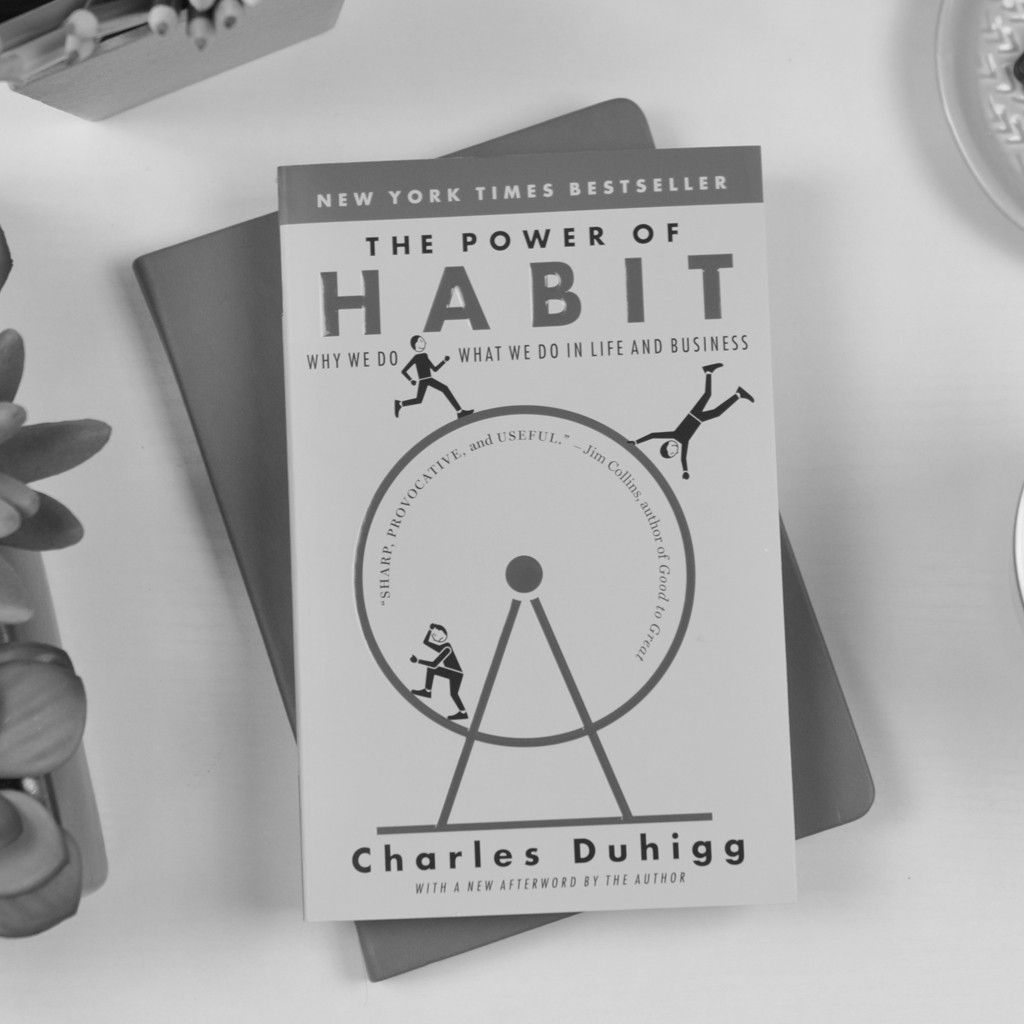

In [6]:
cv2_imshow(grayimg1)

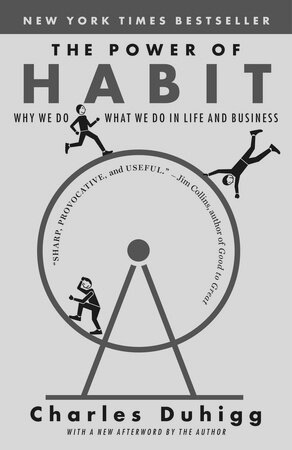

In [7]:
cv2_imshow(grayimg2)

In [12]:
grayimg2.size

131400

In [16]:
## SIFT
sift = cv2.SIFT.create()

keypoints1, descriptor1 = sift.detectAndCompute(grayimg1, None)
keypoints2, descriptor2 = sift.detectAndCompute(grayimg2, None)

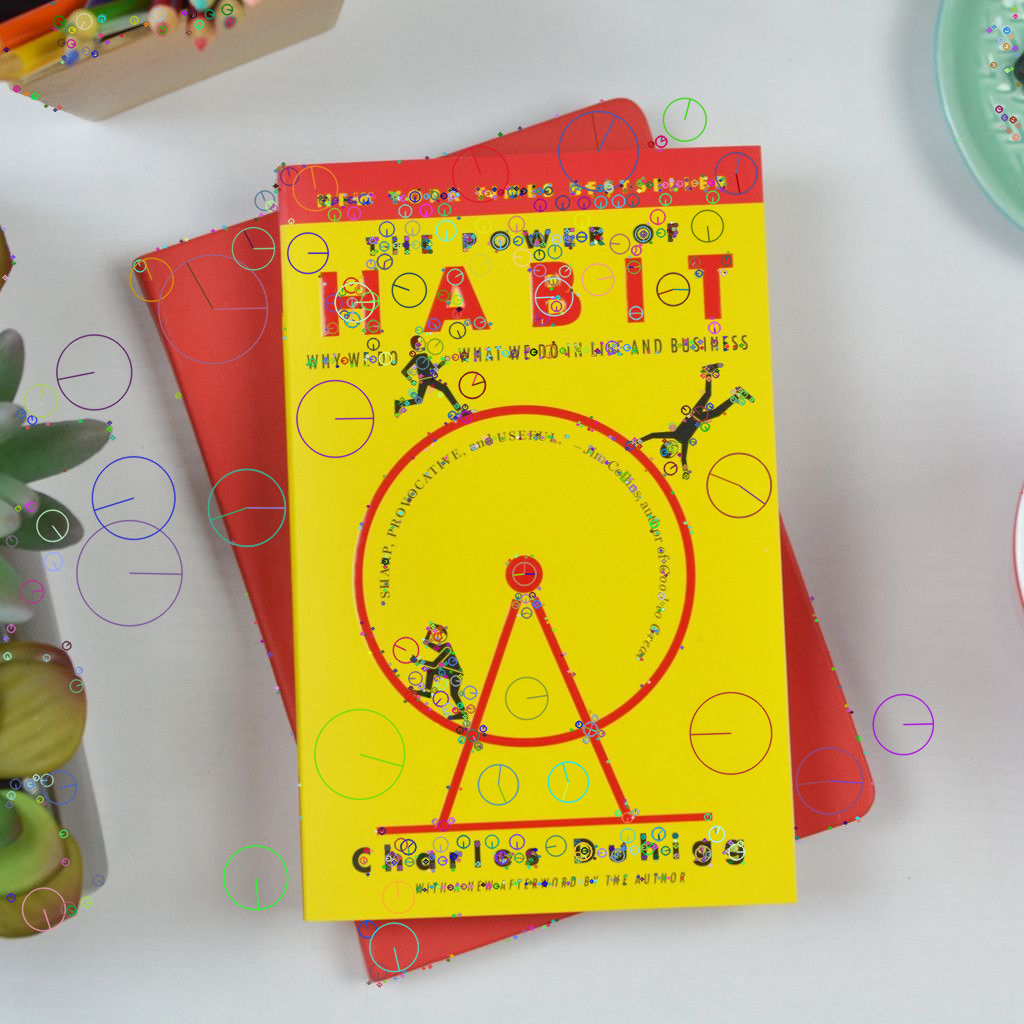

In [17]:
result1 = cv2.drawKeypoints(img1, keypoints1, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2_imshow(result1)

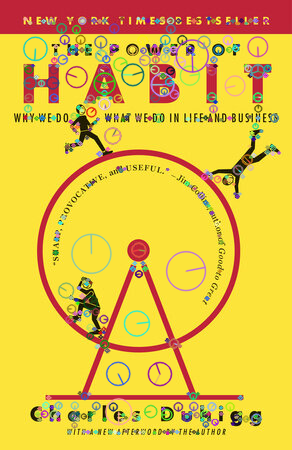

In [19]:
result2 = cv2.drawKeypoints(img2, keypoints2, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2_imshow(result2)

In [20]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptor1, descriptor2)    #기말에 이 코드 나올 수 이씀

In [21]:
matches = sorted(matches, key=lambda x: x.distance)
matched_img = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:50], None, flags=2)

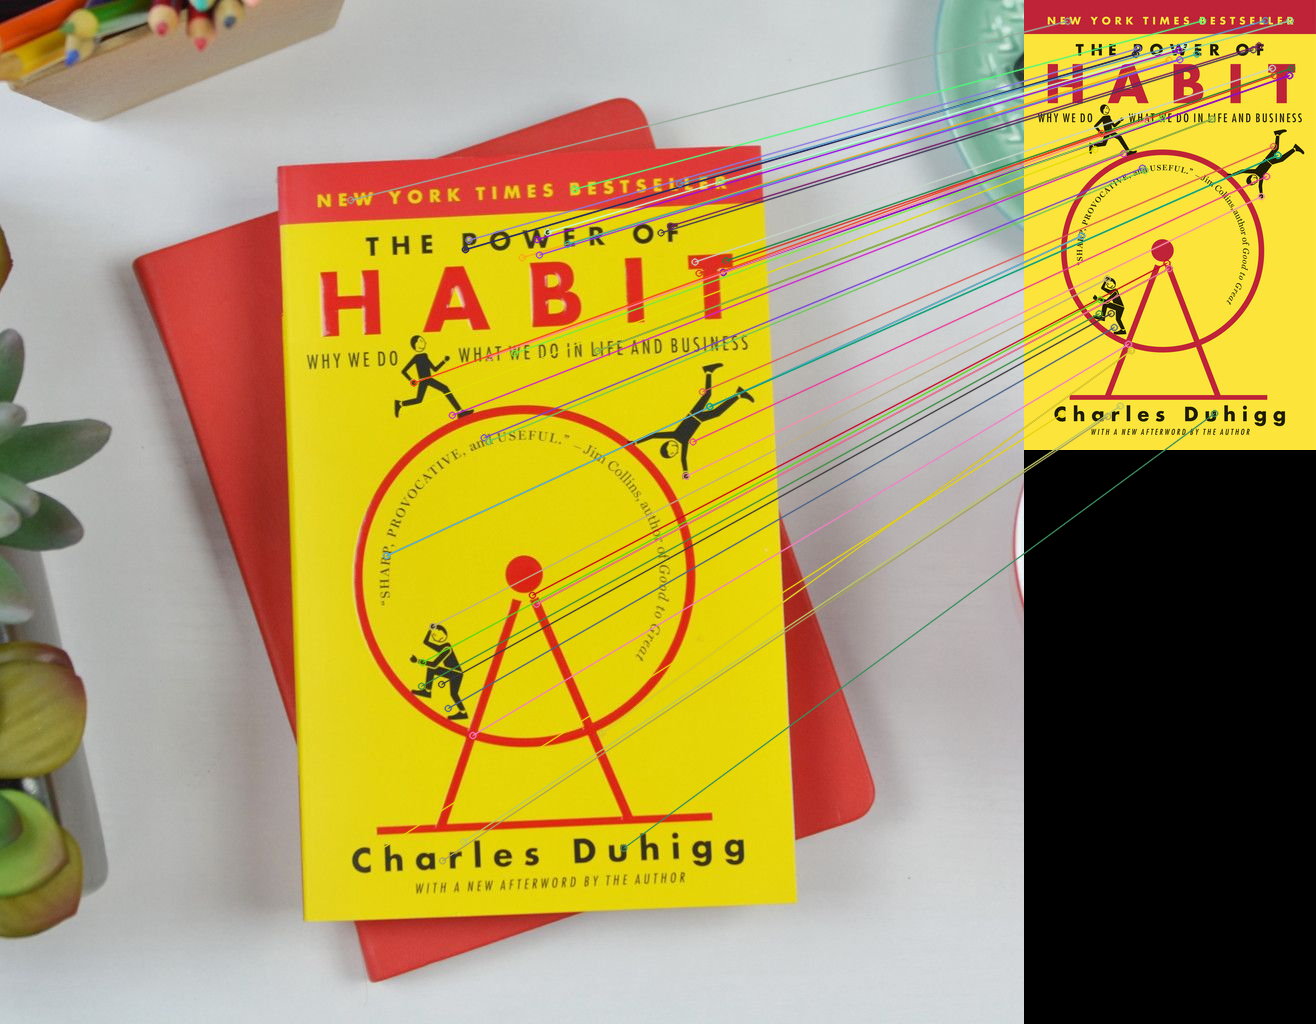

In [22]:
cv2_imshow(matched_img)